In [166]:
%pylab inline
matplotlib.style.use("ggplot")
%cd ~/LabWorkbookForTrello/
from pygments import lexers, formatters, highlight
# Use like this:
# print highlight("code", lexers.DiffLexer(), formatters.TerminalFormatter())
import workbook
import pandas as pd
import collections
reload(workbook)
wb = workbook.ExperimentRepository()


Populating the interactive namespace from numpy and matplotlib
/Users/michael/LabWorkbookForTrello


#(BROKEN) Trying to reproduce the paper

- Batch size: 128
- Layer depth: 20 layers.
- Architecture: No ReLU at the end. Batch norm before adding.

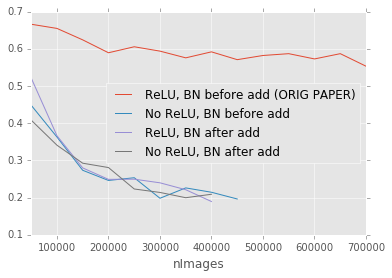

In [49]:
df = wb.meld_csv({
    "201601102039-wgq6T6HuK3": "ReLU, BN before add (ORIG PAPER)",
    "201601102044-01lkOBJQu5": "No ReLU, BN before add",
    "201601102047-YybNsWu8zs": "ReLU, BN after add",
    "201601102047-jBrez4iUNB": "No ReLU, BN after add",
}, "Testing Error.csv","error")
df.drop(np.nan, 0).plot()

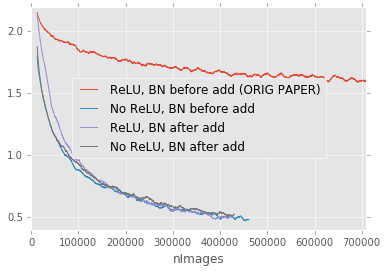

In [50]:
df = wb.meld_csv({
    "201601102039-wgq6T6HuK3": "ReLU, BN before add (ORIG PAPER)",
    "201601102044-01lkOBJQu5": "No ReLU, BN before add",
    "201601102047-YybNsWu8zs": "ReLU, BN after add",
    "201601102047-jBrez4iUNB": "No ReLU, BN after add",
}, "Training loss.csv","loss")
pd.rolling_mean(df, 100).plot()


Oops! I should not have a ReLU just before the softmax!

201601102127-YCl5TEh7Wm is just like 201601102039-wgq6T6HuK3 but the
ReLU just before the softmax is gone... The difference is extremely
pronounced.

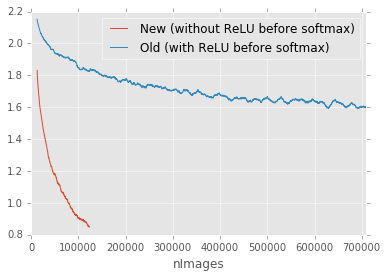

In [51]:
df = wb.meld_csv({
    "201601102039-wgq6T6HuK3": "Old (with ReLU before softmax)",
    "201601102127-YCl5TEh7Wm": "New (without ReLU before softmax)",
    #"201601102044-01lkOBJQu5": "Best (No ReLU, BN before add)", # this doesn't have ReLU
}, "Training loss.csv","loss")
#}, "Testing Error.csv","error")
pd.rolling_mean(df, 100).plot()

# Impact of network size

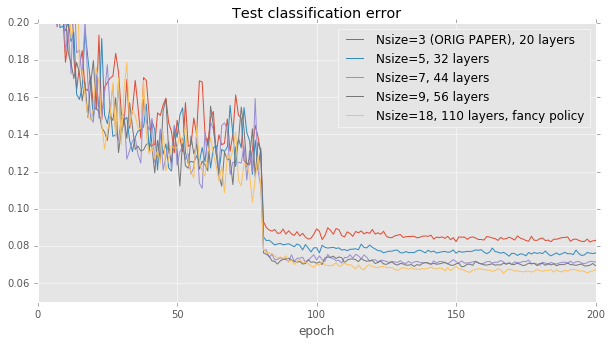

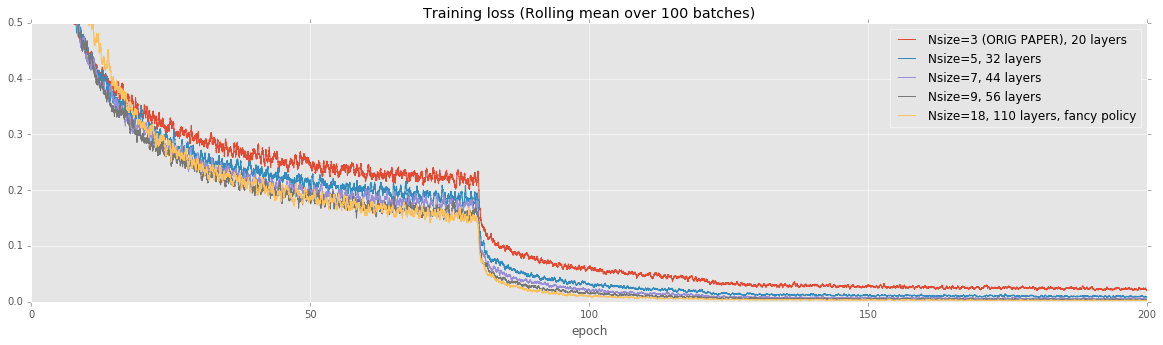

Nsize=3 (ORIG PAPER), 20 layers       0.0829
Nsize=5, 32 layers                    0.0763
Nsize=7, 44 layers                    0.0714
Nsize=9, 56 layers                    0.0694
Nsize=18, 110 layers, fancy policy    0.0673
Name: 200.0, dtype: float64

In [374]:
experiments = collections.OrderedDict([
("201601141709-AnY56THQt7", "Nsize=3 (ORIG PAPER), 20 layers"),
("201601141709-rewkex7oPJ", "Nsize=5, 32 layers"),
("201601141710-HxIw7lGPyu", "Nsize=7, 44 layers"),
("201601141710-te4ScgnYMA", "Nsize=9, 56 layers"),
("201601142006-5T5D1DO3VP", "Nsize=18, 110 layers, fancy policy"),
])
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err = df_err.sort_index(na_position='first')
df_err.index /= 50000.0; df_err.index.name = "epoch"
pd.rolling_mean(df_loss, 100).plot(title="Training loss (Rolling mean over 100 batches)", figsize=(20,5),
                                   xlim=(0,200), ylim=(0, 0.5))
#df_err.plot(title="Error")
df_err.plot(xlim=(0,200), ylim=(0.05,0.2), figsize=(10,5), title="Test classification error")
df_err.loc[200.0]

In [331]:
df_loss.to_csv("/tmp/loss.csv")
df_err.to_csv("/tmp/error.csv")

# (RUNNING) Reproduce the paper. Architecture considerations.

- Batch size: 128
- Layer depth: 20 layers.

Within each block, the paper uses a batch norm before the addition and
a ReLU just after the addition.


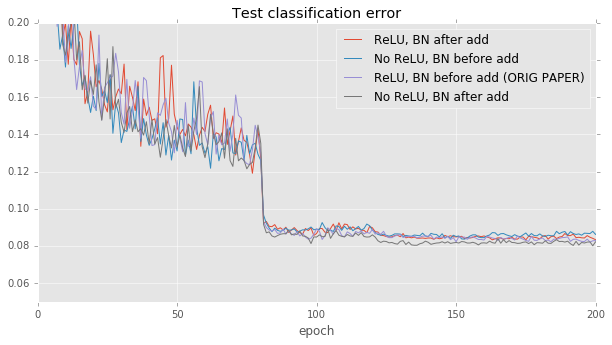

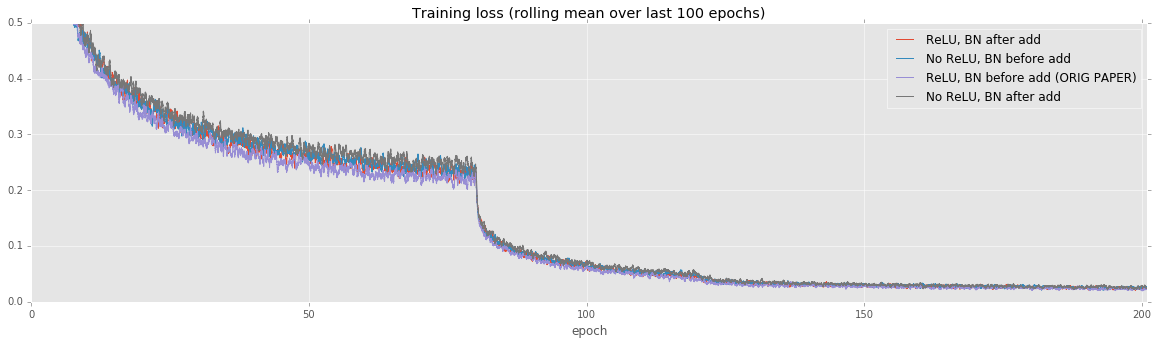

ReLU, BN after add                  0.0834
No ReLU, BN before add              0.0862
ReLU, BN before add (ORIG PAPER)    0.0829
No ReLU, BN after add               0.0823
Name: 200.0, dtype: float64


In [271]:
experiments = {
"201601141709-AnY56THQt7": "ReLU, BN before add (ORIG PAPER)",
"201601150239-QVYmYpbH3q": "No ReLU, BN before add",
"201601150241-1hzPb7ciyU": "ReLU, BN after add",
"201601150241-axhDiLqr7i": "No ReLU, BN after add",
}
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err.index /= 50000.0; df_err.index.name = "epoch"
pd.rolling_mean(df_loss, 100).plot(title="Training loss (rolling mean over last 100 epochs)", figsize=(20,5), ylim=(0, 0.5))
df_err.plot(xlim=(0,200), ylim=(0.05,0.2), figsize=(10,5), title="Test classification error")
print df_err.loc[200]

# Effect of alternate optimization strategies

In [319]:
experiments = collections.OrderedDict([
    ## "201601131450-saow6XW51R", "RMSprop, 1.0, alt" # Canceled -- diverging
    ## "201601131447-2hTIt6NxCZ", "RMSprop, 0.1", # Canceled -- diverging
    ("201601141709-AnY56THQt7", "Original paper: Nesterov, 1e-1"),
    ("201601151303-ayJ2l8MOG8", "RMSprop, 1e-4"),
    ("201601151304-6ZsIojJlPJ", "RMSprop, 1e-3"),
    ("201601151305-7otmCNmpoe", "RMSprop, 1e-2"),
    ("201601161504-tXataWU37D", "RMSprop, 1e-1"),
    ("201601151301-Lnn44vqJzD", "Adadelta, rho = 0.3"),
    ("201601151737-WwNIIPJPY1", "Adagrad, 1e-3"),
    ("201601151737-crjAOCswyd", "Adagrad, 1e-2"),
    ("201601151737-ksrtcnWFzb", "Adagrad, 1e-1"),
])
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err.index /= 50000.0; df_err.index.name = "epoch"
#df_err = df_error.sort_index(na_position='first')

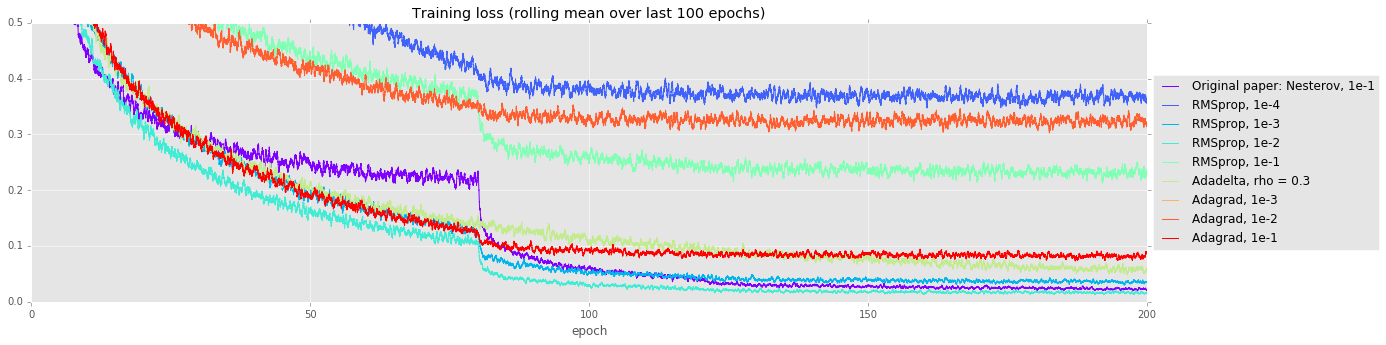

In [324]:
fig,ax = subplots()
ax.set_color_cycle([plt.cm.rainbow(i) for i in np.linspace(0, 1, len(experiments))])
pd.rolling_mean(df_loss, 100).plot(
    title="Training loss (rolling mean over last 100 epochs)",
    figsize=(20, 5),
    xlim=(0,200),
    ylim=(0, 0.5),
    ax=ax,
    legend=False,
)
legend=ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
fig.savefig("/tmp/fig.png", bbox_inches="tight", additional_artists=[legend])

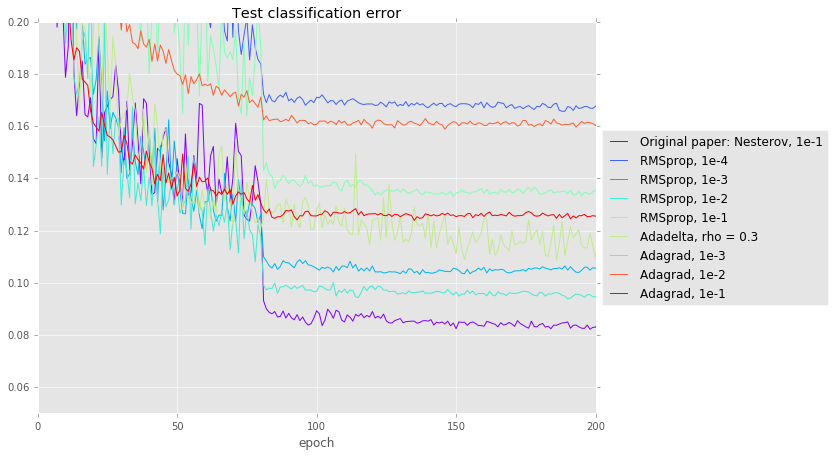

Original paper: Nesterov, 1e-1    0.0829
RMSprop, 1e-4                     0.1677
RMSprop, 1e-3                     0.1055
RMSprop, 1e-2                     0.0945
RMSprop, 1e-1                     0.1354
Adadelta, rho = 0.3               0.1093
Adagrad, 1e-3                     0.3536
Adagrad, 1e-2                     0.1603
Adagrad, 1e-1                     0.1255
Name: 200.0, dtype: float64


In [325]:
fig,ax = subplots()
ax.set_color_cycle([plt.cm.rainbow(i) for i in np.linspace(0, 1, len(experiments))])
df_err.plot(
    xlim=(0, 200),
    ylim=(0.05, 0.2),
    figsize=(10, 7),
    title="Test classification error",
    ax=ax,
    legend=False,
)
legend = ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
fig.savefig("/tmp/fig.png", bbox_inches="tight", additional_artists=[legend])
print df_err.iloc[200]

In [0]:
for k,v in experiments.items():
    print "\n\n", ("#"*30), k,v
    print wb[k]['opt.json']
    print highlight(wb[k]["Source.git-patch"], lexers.DiffLexer(), formatters.TerminalFormatter())


# (RUNNING) Kaiming suggests using smaller batchnorm momentum
NEEDS PATCHING CHECK

The NVIDIA CuDNNv4 documentation suggests setting momentum to 1/(1+n)
at every iteration. This should give us more stable testing
convergence.

Kaiming wrote back with the following clue:

    1. I noticed that you observed the results are unstable. This may be
    caused by your way of doing BN (I am sorry that I have not checked the
    code as I am not familiar with Torch). In particular, the way of doing
    BN at test-time seems important. In our implementation, the BN
    statistics (mean/var) used for testing are computed on (virtually) all
    training images, and in practice, a very large batch of training image
    will provide statistically the same BN statistics. If you compute BN
    mean/var for testing on a mini-batch that is too small, the results
    might be unstable. In my experiments, the variations of stopping at
    different final epochs of a single run is within 0.1-0.2%; but "more
    than half of a percent" sounds too much for me. Besides, the
    training-time implementation of BN also seems to matter.

So this experiment is using the batch normalization strategy suggested
by the nvidia documentation.

From printing updates, I see that CuDNN's BN has the following behavior:

- Momentum=0 implies updates don't happen at all.
- Momentum=1 implies that the update happens within every batch.


In [327]:
experiments = {
    "201601141709-AnY56THQt7": "Original paper: BN momentum = 0.1",
    "201601152147-5FnI40cDEn": "BN, momentum = 0.01",
    "201601152146-zSNYQ6nPRy": "BN, momentum = 1 just for fun",
    "201601152149-Cz6WnhMbTK": "Dynamic, reset every epoch.",
#"": "BN, dynamic momentum = 1/(1+n)", # canceled
#"": "BN, dynamic momentum = 1 - 1/(1+n)",
#"": "BN, momentum = 0.99",
#"": "BN, momentum = 0.9",
}
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err = df_err.sort_index(na_position='first')
df_err.index /= 50000.0; df_err.index.name = "epoch"

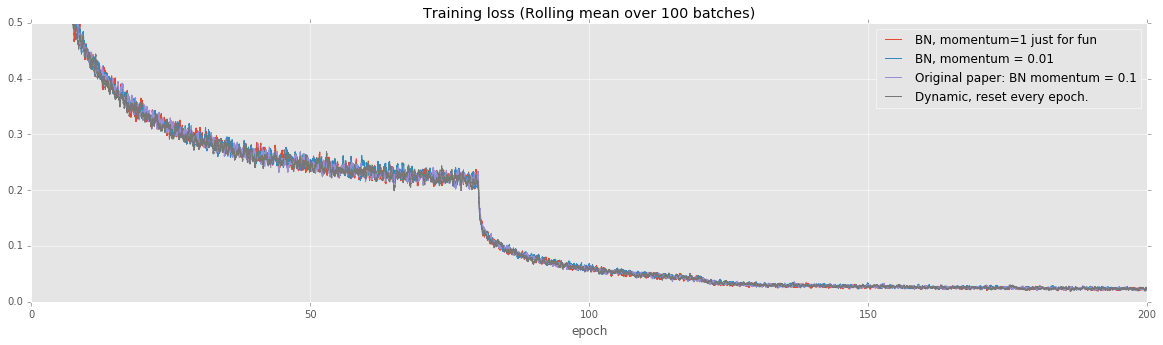

In [283]:
pd.rolling_mean(df_loss,100).plot(
    title="Training loss (Rolling mean over 100 batches)",
    figsize=(20,5),
    xlim = (0.0, 200.0),
    ylim = (0.0, 0.5),
)

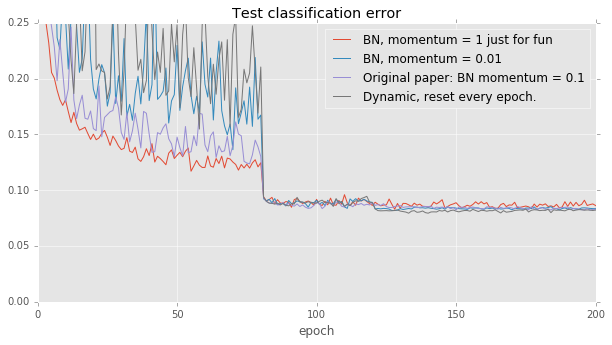

In [328]:
pd.rolling_mean(df_err, 1).plot(
    xlim=(0, 200),
    ylim=(0, 0.25),
    title="Test classification error",
    figsize=(10,5),
)

In [329]:
print df_err.loc[200]

BN, momentum = 1 just for fun        0.0863
BN, momentum = 0.01                  0.0835
Original paper: BN momentum = 0.1    0.0829
Dynamic, reset every epoch.          0.0822
Name: 200.0, dtype: float64


# Test Kaixhin's PR

In [285]:
experiments = {
    "201601141709-AnY56THQt7": "Original (before PR #3)",
    "201601160002-veS9TMCBjP": "Kaixhin's proposed nninit (after PR #3)",
}
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err = df_err.sort_index(na_position='first')
df_err.index /= 50000.0; df_err.index.name = "epoch"

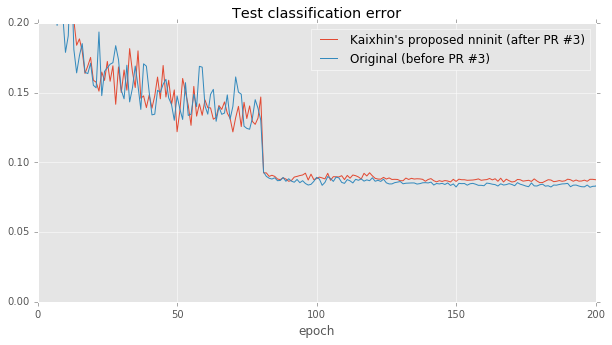

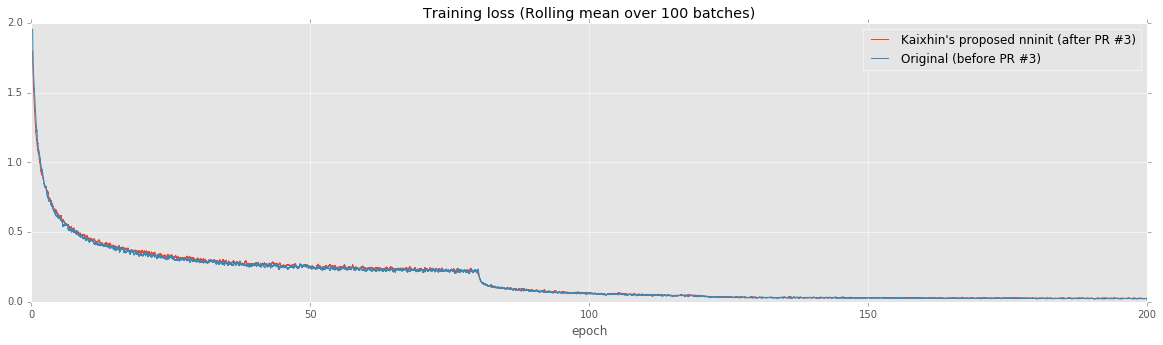

In [287]:
pd.rolling_mean(df_loss, 100).plot(
    title="Training loss (Rolling mean over 100 batches)",
    figsize=(20,5),
    xlim=(0,200),
    #ylim=(0, 0.5)
)
df_err.plot(
    xlim=(0,200),
    ylim=(0.0,0.2),
    figsize=(10,5),
    title="Test classification error",
)

In [289]:
df_err.loc[200]

Kaixhin's proposed nninit (after PR #3)    0.0875
Original (before PR #3)                    0.0829
Name: 200.0, dtype: float64

# Architectural considerations on DEEP networks

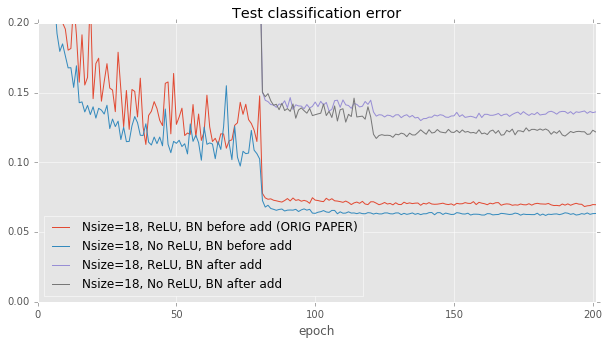

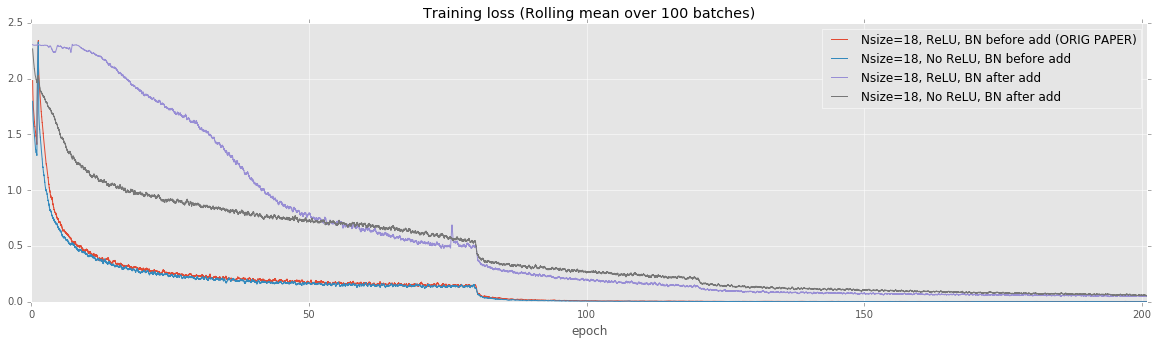

Nsize=18, ReLU, BN before add (ORIG PAPER)    0.0697
Nsize=18, No ReLU, BN before add              0.0632
Nsize=18, ReLU, BN after add                  0.1356
Nsize=18, No ReLU, BN after add               0.1230
Name: 200.0, dtype: float64


In [378]:
experiments = collections.OrderedDict([
    ("201601181920-jmOtpiNPQa", "Nsize=18, ReLU, BN before add (ORIG PAPER)"),
    ("201601181924-V2wDg0NKDK", "Nsize=18, No ReLU, BN before add"),
    ("201601181922-8VYWhyuTuA", "Nsize=18, ReLU, BN after add"),
    ("201601181923-Qfp5mTA2u9", "Nsize=18, No ReLU, BN after add"),
])
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err = df_err.sort_index(na_position='first')
df_err.index /= 50000.0; df_err.index.name = "epoch"
pd.rolling_mean(df_loss, 100).plot(
    title="Training loss (Rolling mean over 100 batches)",
    figsize=(20,5),
    #xlim=(0,200),
    #ylim=(0, 0.5)
)
df_err.plot(
    #xlim=(0,200),
    ylim=(0.0,0.2),
    figsize=(10,5),
    title="Test classification error",
)
print df_err.loc[200]

#(RUNNING) Alternate solvers on DEEP networks

In [386]:
experiments = collections.OrderedDict([
    ("201601181920-jmOtpiNPQa", "Nsize=18, Original paper: Nesterov, 1e-1"),
    ("201601191725-OTEHdMJRtp", "Nsize=18, RMSprop, 1e-4"),
    ("201601191726-X466YKOnlN", "Nsize=18, RMSprop, 1e-3"),
    ("201601191725-71X8twhcfT", "Nsize=18, RMSprop, 1e-2"),
    ("201601191613-QBvwLt6g9M", "Nsize=18, RMSprop, 1e-1"),
    ("201601201357-GXV7SgYNlz", "Nsize=18, Adadelta"),
    ("201601201427-K6bLlB26az", "Nsize=18, Adagrad, 1e-3"),
    ("201601201448-qlko0nyx8J", "Nsize=18, Adagrad, 1e-2"),
    ("201601201654-OApx8tj3ZU", "Nsize=18, Adagrad, 1e-1"),
])
df_loss = wb.meld_csv(experiments, "Training loss.csv","loss")
df_loss.index /= 50000.0; df_loss.index.name = "epoch"
pd.rolling_mean(df_loss, 100).plot(
    title="Training loss (Rolling mean over 100 batches)",
    figsize=(20,5),
    xlim=(0,200),
    ylim=(0, 2.5)
)

AttributeError: 'NoneType' object has no attribute 'get_contents_as_string'

In [0]:
for k,v in experiments.items():
    print "\n\n", ("#"*30), k,v
    print wb[k]['opt.json']
    print highlight(wb[k]["Source.git-patch"], lexers.DiffLexer(), formatters.TerminalFormatter())

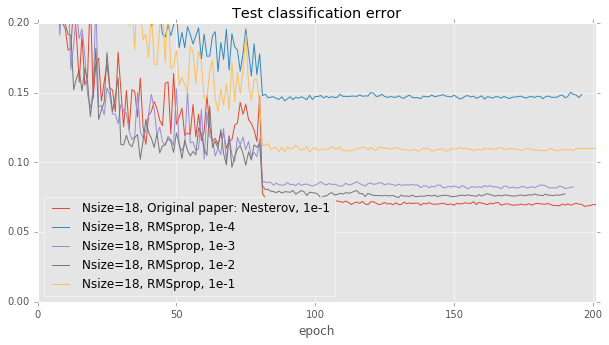

In [385]:
df_err = wb.meld_csv(experiments, "Testing Error.csv","error")
df_err.index /= 50000.0; df_err.index.name = "epoch"
df_err.plot(
    #xlim=(0,200),
    ylim=(0.0,0.2),
    figsize=(10,5),
    title="Test classification error",
)

#(TODO) Kaixhin suggests trying other nonlinearities

If this were true than a sigmoid would perform better than tanh, and
ReLUs would perform better than Leaky ReLUs and ELUs

# (TODO) Try Kai Arulkumaran's orthoganal initialization! See github pull request.

# Showing artifacts

In [376]:
def show_experiment(tag):
    url = "https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/%s/"%tag
    print "[Model]({model}), [Loss]({loss}) and [Error]({error}) logs, [Source commit]({commit}) + [patch]({patch})".format(
    model= url+"model.t7",
    loss= url+"Training%20loss.csv",
    error= url+"Testing%20Error.csv",
    commit= url+"Source.git-current-commit",
    patch= url+"Source.git-patch",
)

In [379]:
for k,v in experiments.items():
    print "\n\n"+v
    show_experiment(k)



Nsize=18, ReLU, BN before add (ORIG PAPER)
[Model](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181920-jmOtpiNPQa/model.t7), [Loss](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181920-jmOtpiNPQa/Training%20loss.csv) and [Error](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181920-jmOtpiNPQa/Testing%20Error.csv) logs, [Source commit](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181920-jmOtpiNPQa/Source.git-current-commit) + [patch](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181920-jmOtpiNPQa/Source.git-patch)


Nsize=18, No ReLU, BN before add
[Model](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181924-V2wDg0NKDK/model.t7), [Loss](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181924-V2wDg0NKDK/Training%20loss.csv) and [Error](https://mjw-xi8mledcnyry.s3.amazonaws.com/experiments/201601181924-V2wDg0NKDK/Testing%20Error.csv) logs, [Source commit](https://mjw-xi8mledcnyry.s3.amazonaws